In [55]:
import pandas as pd

# Load the dataset
file_path = "WineQT.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Drop the 'Id' column as it's not useful
df.drop(columns=["Id"], inplace=True)



# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8  

In [40]:
# Display summary statistics
print(df.describe())

# Calculate additional statistics
stats_df = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Variance": df.var(),
    "Standard Deviation": df.std(),
    "Skewness": df.skew(),
    "Kurtosis": df.kurtosis()
})

print("\nAdditional Statistics:\n", stats_df)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

Histogram


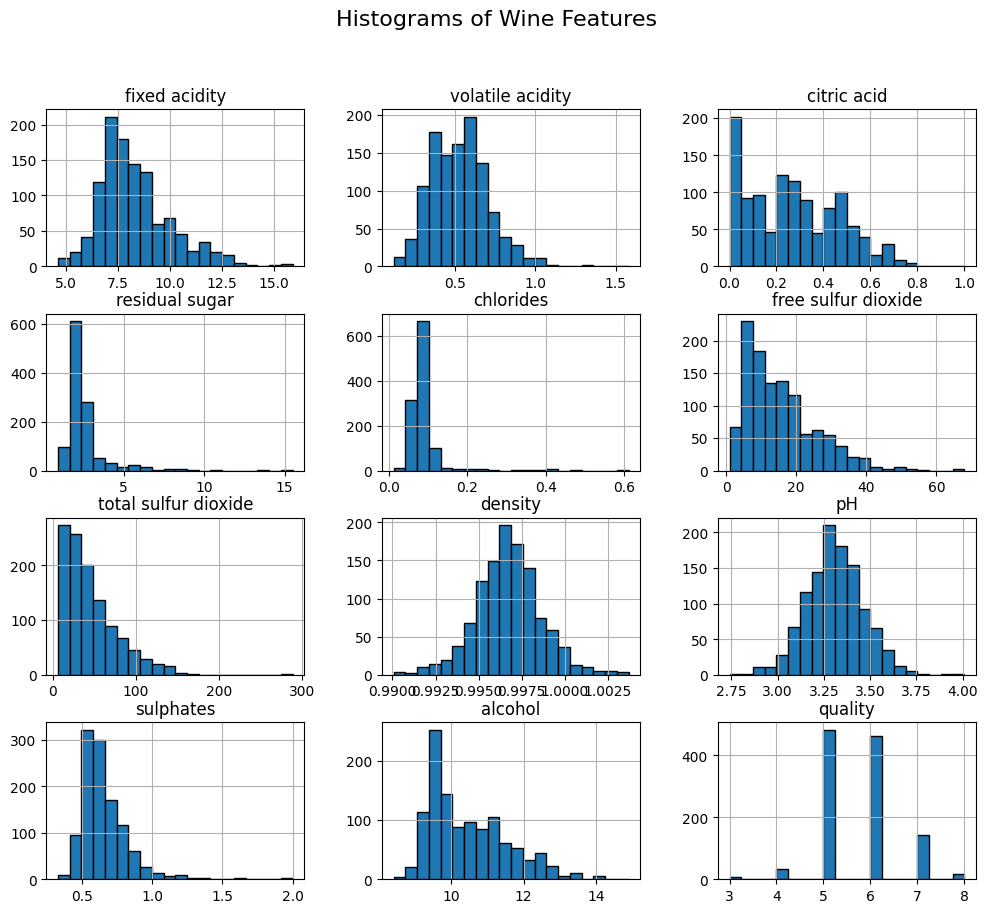

In [41]:
import matplotlib.pyplot as plt

# Plot histograms for all columns
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Wine Features", fontsize=16)
plt.show()


**scatter plot**

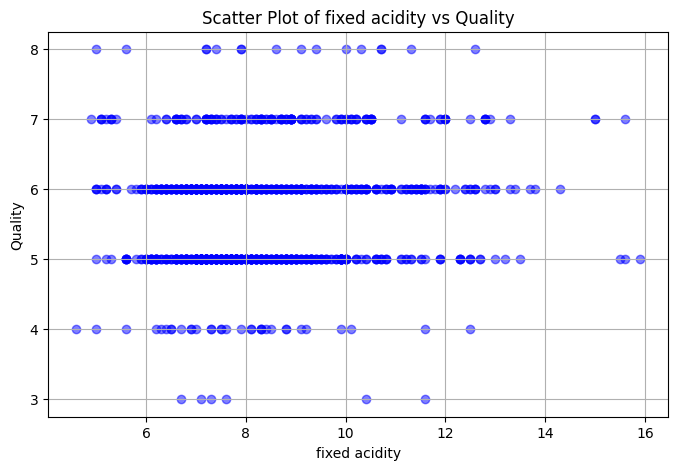

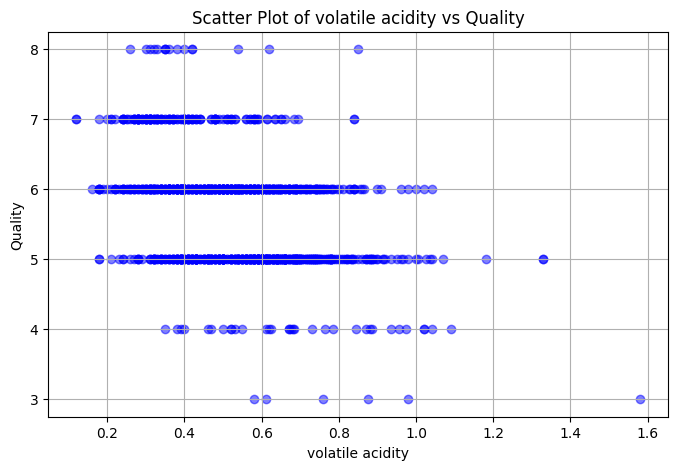

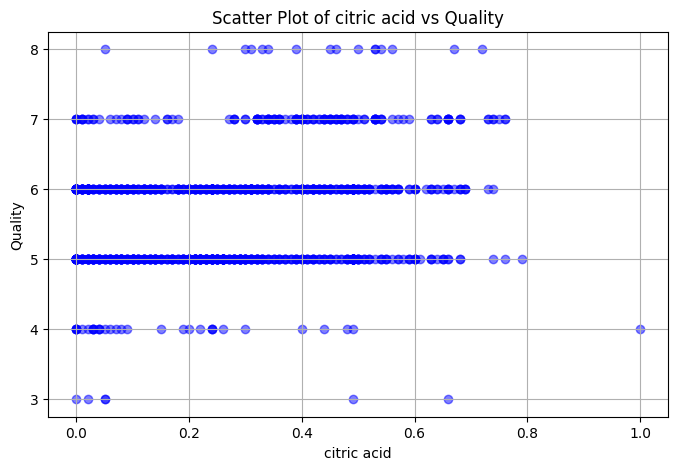

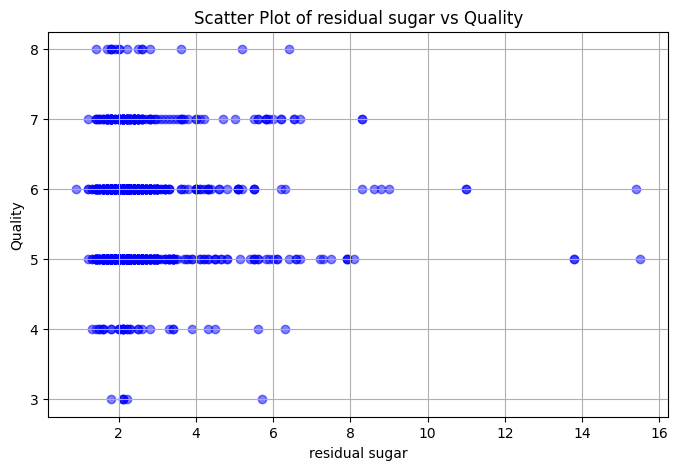

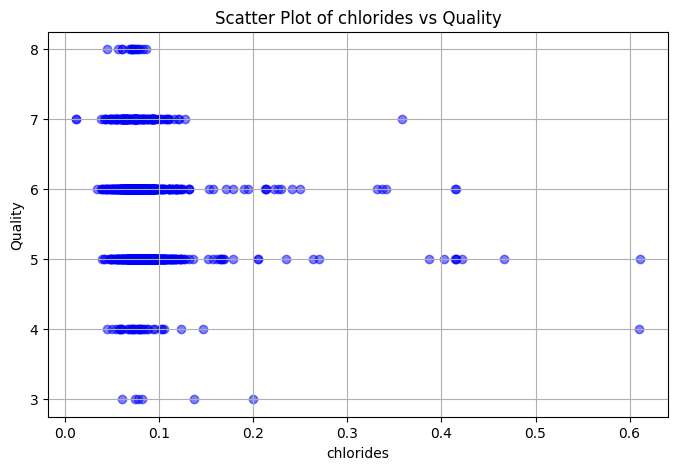

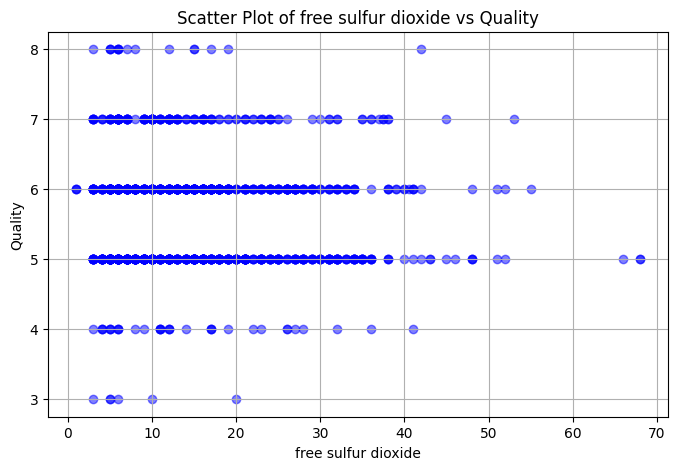

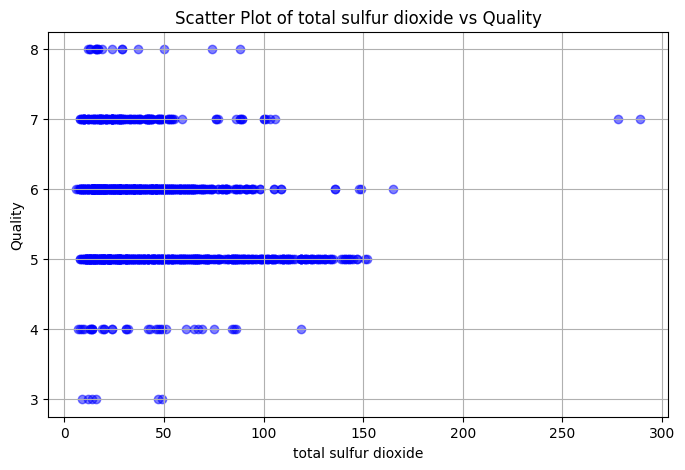

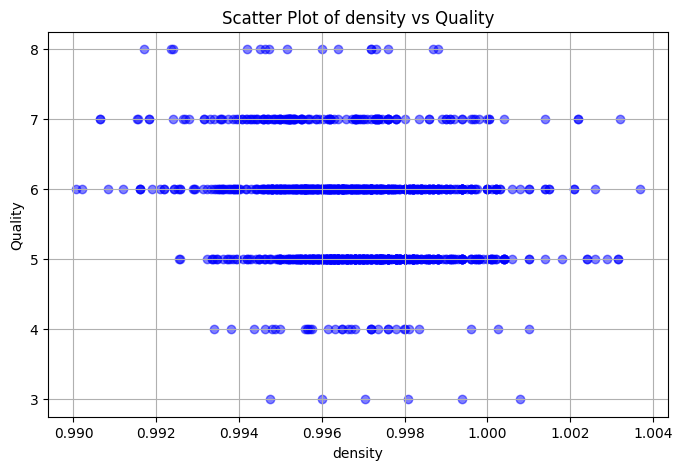

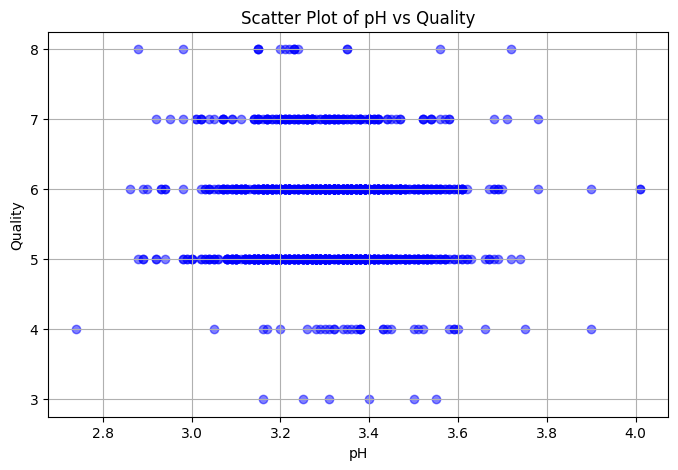

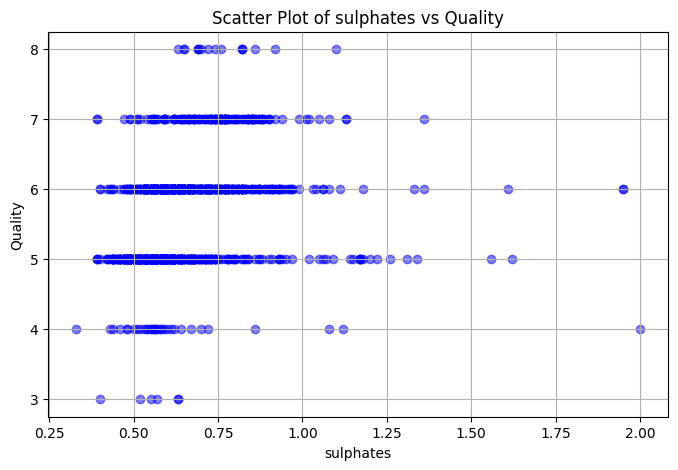

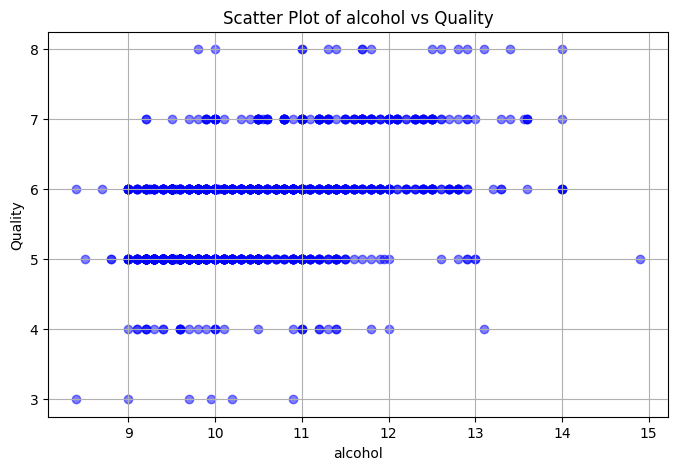

In [42]:
# Scatter plots for each column vs. quality
for column in df.columns:
    if column != "quality":
        plt.figure(figsize=(8, 5))
        plt.scatter(df[column], df["quality"], alpha=0.5, color="blue")
        plt.xlabel(column)
        plt.ylabel("Quality")
        plt.title(f"Scatter Plot of {column} vs Quality")
        plt.grid(True)
        plt.show()


Box plot

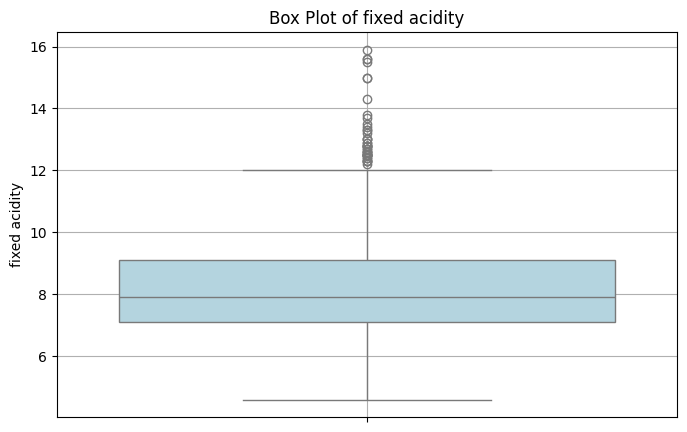

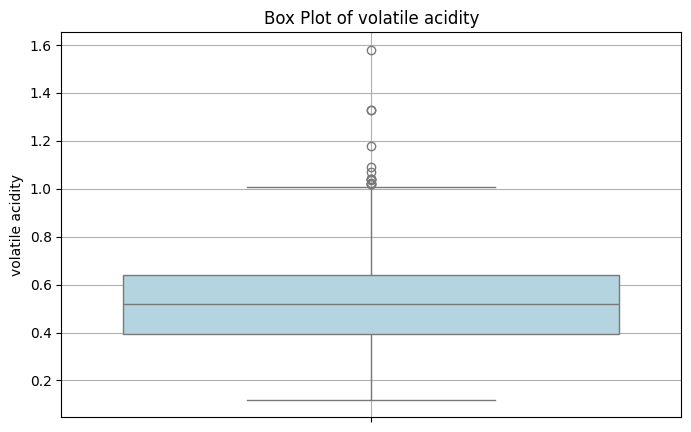

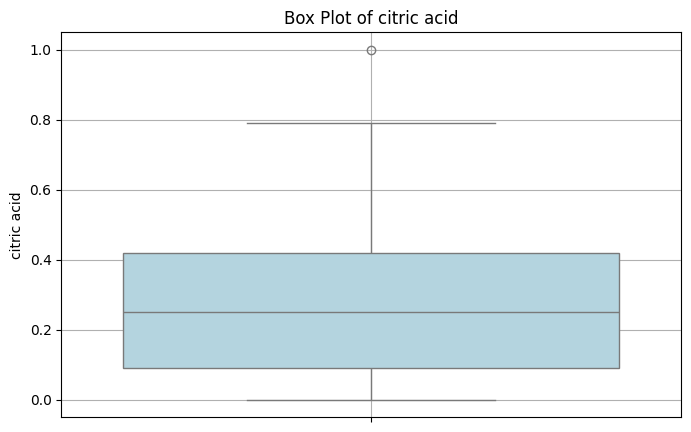

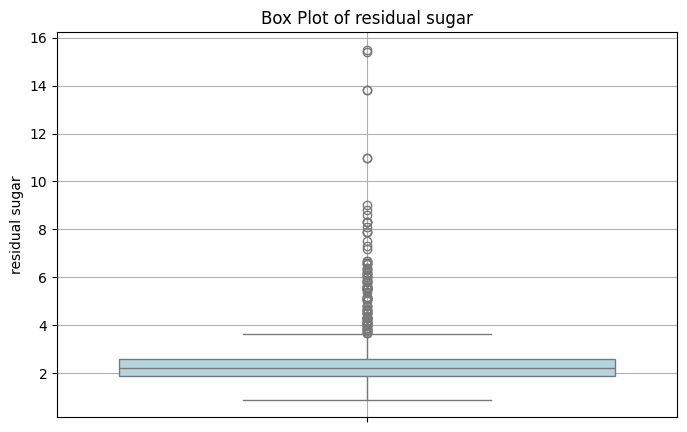

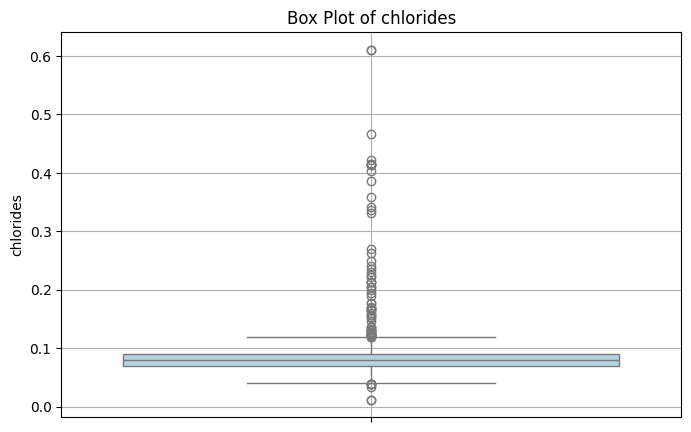

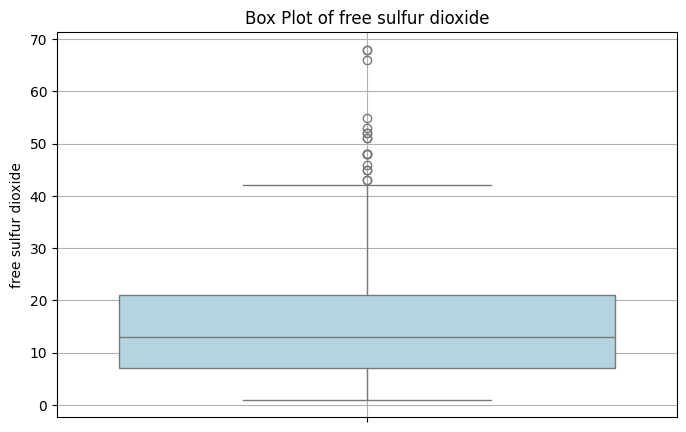

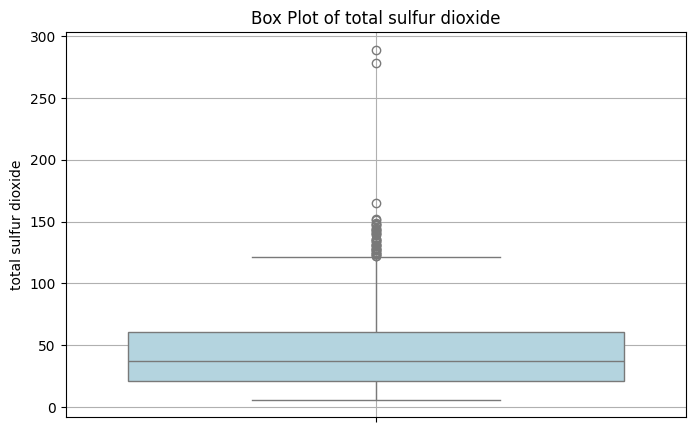

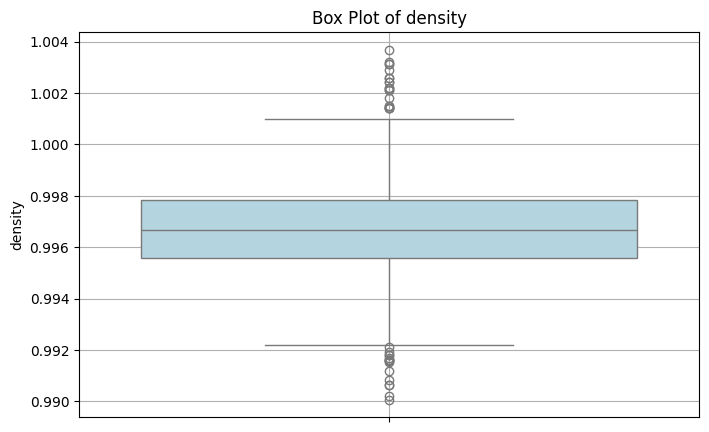

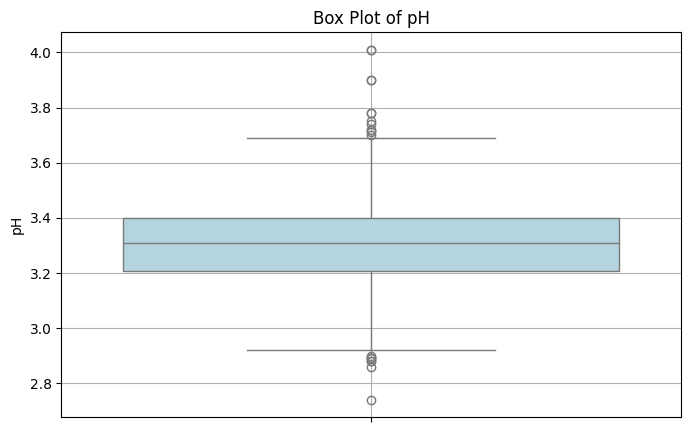

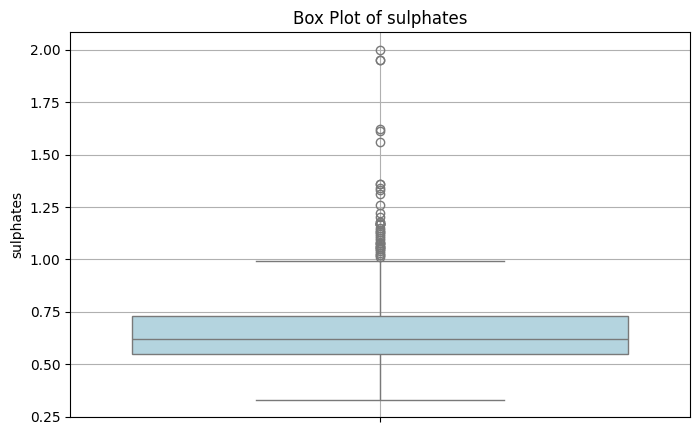

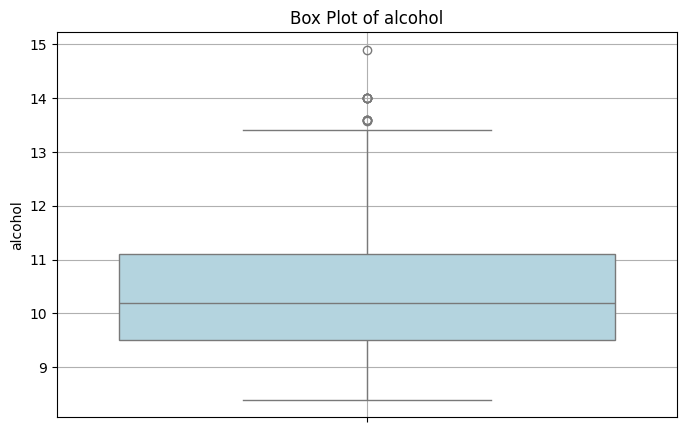

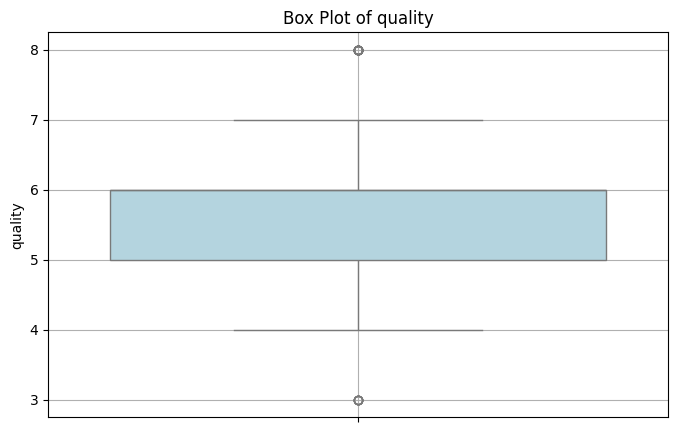

In [43]:
import seaborn as sns

# Box plots for each column
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[column], color="lightblue")
    plt.title(f"Box Plot of {column}")
    plt.grid(True)
    plt.show()


**Removing of outliers**

In [44]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print(f"Original dataset size: {df.shape[0]}, After outlier removal: {df_cleaned.shape[0]}")


Original dataset size: 1143, After outlier removal: 834


Training machine learning models

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare data for machine learning
X = df_cleaned.drop(columns=["quality"])
y = df_cleaned["quality"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


logistic regression


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6287
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.65      0.80      0.72        65
           6       0.62      0.63      0.62        79
           7       0.50      0.14      0.22        21

    accuracy                           0.63       167
   macro avg       0.44      0.39      0.39       167
weighted avg       0.61      0.63      0.60       167



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


random forest


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6407
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.63      0.82      0.71        65
           6       0.66      0.61      0.63        79
           7       0.60      0.29      0.39        21

    accuracy                           0.64       167
   macro avg       0.47      0.43      0.43       167
weighted avg       0.63      0.64      0.62       167



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


svm

In [49]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel="rbf")
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6048
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.63      0.77      0.69        65
           6       0.60      0.62      0.61        79
           7       0.33      0.10      0.15        21

    accuracy                           0.60       167
   macro avg       0.39      0.37      0.36       167
weighted avg       0.57      0.60      0.58       167



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, precision_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}") # Specify average='macro' for multiclass
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}") # Specify average='macro' for multiclass
print("-" * 50)

Decision Tree Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       0.61      0.60      0.60        65
           6       0.56      0.56      0.56        79
           7       0.44      0.38      0.41        21

    accuracy                           0.54       167
   macro avg       0.40      0.38      0.39       167
weighted avg       0.56      0.54      0.55       167

F1 Score (macro): 0.3939
Precision (macro): 0.4045
--------------------------------------------------


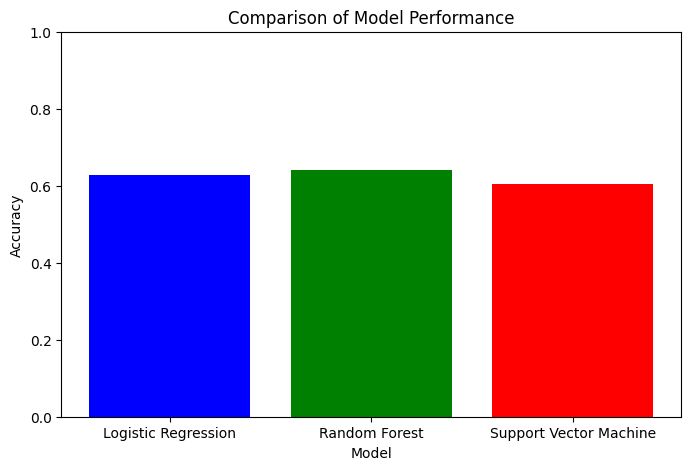

In [56]:
# Compare model performances
results = {
    "Logistic Regression": lr_accuracy,
    "Random Forest": rf_accuracy,
    "Support Vector Machine": svm_accuracy
}

# Plot the comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Performance")
plt.ylim(0, 1)
plt.show()


comparing model performancem